## Formazione di Runoff superficiale 

Produzione dovuto al fatto che ci sia una maggiore intensità di precipitazione rispetto alla capacità del suolo

Bisogna aggiornare la griglia, aggiungere un altro volume di controllo per vedere quanta acqua si accumula in superficie.

Facciamo inizialmente la trattazione con valori caratterizzanti un suolo secco: la suzione cambia da -2 a 0 nei 2m di suolo che stiamo prendendo in considerazione

nel caso di fondo secco - falda sotto - acqua risale fino a costruire di equilibrio: non si parte da c. idrostatica

L'acqua può muoversi verso l'alto: suolo asciutto, al fondo suzione = 0, in diretto contatto con la flada. in superficie flusso nullo, non entra acqua = se dura per un tempo abbastanza lungo sale acqua.

In [1]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')
from geoframepy.timeseries import io_csv

project_path = os.path.dirname(os.getcwd())

In [2]:
grid_input_file_name = project_path + "/data/Grid_input/cap_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/cap_ic.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.01
dz_max = 0.05
b = 0.5
psi_interp_model = "linear"
T_interp_model = "linear"

water_ponding_0 = -115.0
T_water_ponding_0 = 273.15
output_file_name =  project_path + "/data/Grid_NetCDF/Cap.nc"

output_title = '''
'''
output_summary = '''


'''

output_date = ''

output_institution = 'GEOframe'

Nel suolo vale l'equazione di Richards, inoltre possiamo accumulare acqua in superficie

In [3]:
output_file_name =  project_path + "/data/Grid_NetCDF/Cap.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,400,1,10
L,-2,0,nan,nan


eta,Psi0,T0
0,-1.50,273.15
-2,0.5,273.15

'''


output_institution = 'GEOframe'

In [4]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\emmat\Desktop\Progetto idrologia\OMS_WHETGEO1D/data/Grid_NetCDF/Cap.nc


In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
os.chdir(project_path+'/output')
ds = xr.open_dataset("Cap_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 401, dualDepth: 401, time: 1953)
Coordinates:
  * depth             (depth) float64 -1.998 -1.993 -1.988 ... -0.0025 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.995 -1.99 ... -0.01 -0.005 0.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-09-01
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 dry initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

In [7]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/0Pioggia.csv',datetime_index=True)
rain

,0
Datetime,
2020-01-01 00:00:00,0.0
2020-01-01 00:05:00,0.0
2020-01-01 00:10:00,0.0
2020-01-01 00:15:00,0.0
2020-01-01 00:20:00,0.0
...,...
2020-08-31 23:40:00,0.0
2020-08-31 23:45:00,0.0
2020-08-31 23:50:00,0.0


ValueError: x and y must have same first dimension, but have shapes (1953,) and (70273,)

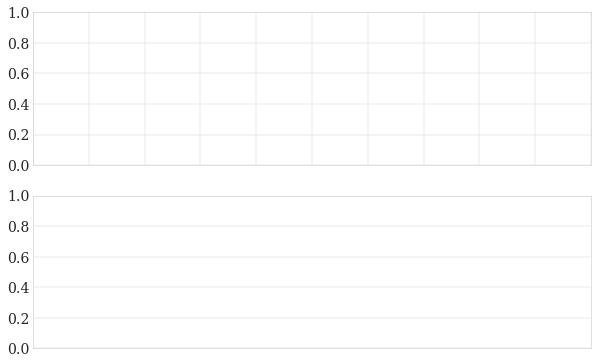

In [8]:
start = '2020-01-01 00:00'
end = '2020-09-01 00:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][start:end]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

#già abbiamo la suzione. sopra abbiamo in azzurro l'intensità di pioggia, in mm/s mentre i nero il volume d'acqua che abbiamo in superficie
# quando inizia a piovere l'acqua inizia ad accumularsi in superficie = inizialmente si infiltra e poi la gran parte del volume di pioggia tende ad accumularsi in superficie
#quando la pioggia finisce il volume d'acqua raggiunge il massimo e poi man mano decresce
# in questo caso quello che assegnameno è il valore della suzione, lo assegnamo a priori

In [ ]:
start = '2020-01-01 00:00'
end = '2020-09-01 00:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5,  method='nearest').plot(ax=ax1, color=colors[4])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

# grafici relativi alle suzioni a diverse profondità
#i segnali qui sono tutti molto simili tra loro, la curva è via via sempre più arrotondata, non ci sono discontinuità, le varie curve sono ritardate una rispetto all'altra

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 01:00').plot(ax=ax1, y='depth', label='2020-01-01 01:00', color='red')
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax1, y='depth', label='2020-01-01 02:00', color='green')
ds.psi.sel(time='2020-01-01 03:00').plot(ax=ax1, y='depth', label='2020-01-01 03:00', color='blue')
ds.psi.sel(time='2020-01-01 06:00').plot(ax=ax1, y='depth', label='2020-01-01 06:00', color='orange')
ds.psi.sel(time='2020-01-01 18:00').plot(ax=ax1, y='depth', label='2020-01-01 18:00', color='magenta')
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 01:00', color='red')
ds.theta.sel(time='2020-01-01 02:00').plot(ax=ax2, y='depth', label='2020-01-01 02:00', color='green')
ds.theta.sel(time='2020-01-01 03:00').plot(ax=ax2, y='depth', label='2020-01-01 03:00', color='blue')
ds.theta.sel(time='2020-01-01 06:00').plot(ax=ax2, y='depth', label='2020-01-01 06:00', color='orange')
ds.theta.sel(time='2020-01-01 18:00').plot(ax=ax2, y='depth', label='2020-01-01 18:00', color='magenta')

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

-100m sono un po' troppi, fanno una condizione secca
-1m contenuti d'acqua

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

#flussi al fondo = impermeabile. il flusso al fondo è 0. la simulazione rimane pressocchè pari a 0
# il fatto che la velocità decresca è perchè i gradienti rimangono via via più piccoli
#man mano che il gradiente della capillarità diventa più piccolo diventa sempre più importante la gravità

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

#cumulata dei volumi che entrano/escono dal dominio
#per ogni time step sappiamo che dalle ore 00 alle 15 il volume d'acqua entrato è tra i 3 ai 4mm.


L'ultimo grafico mostra la cumulata del flusso di acqua tra l'1.00 e le 4.00 del mattino. Il volume è pari a 25mm.

In [ ]:
os.chdir(project_path+'/output')

In [ ]:
ds = xr.open_dataset("Runoff_dry_8_0000.nc")
ds

In [ ]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'][0:288]/300)
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

#già abbiamo la suzione. sopra abbiamo in azzurro l'intensità di pioggia, in mm/s mentre i nero il volume d'acqua che abbiamo in superficie
# quando inizia a piovere l'acqua inizia ad accumularsi in superficie = inizialmente si infiltra e poi la gran parte del volume di pioggia tende ad accumularsi in superficie
#quando la pioggia finisce il volume d'acqua raggiunge il massimo e poi man mano decresce
# in questo caso quello che assegnameno è il valore della suzione, lo assegnamo a priori

In [ ]:
start = '2020-01-01 00:00'
end = '2020-08-01 03:00'

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.sel(time=slice(start,end)), rain['0'][start:end]/300,  color='#084594', label='Rainfall intensity')
(-ds.darcyVelocity.sel(dualDepth=0, method='nearest')*1000).plot(ax=ax[0], color='#4292c6', label='Infiltration')

ax[0].set_ylabel('[mm/s]')
ax[0].set_title(None)
ax[0].legend(loc='upper left')

ax1=ax[0].twinx()
ds.waterVolume.sel(time=slice(start,end)).sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.5')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.sel(time=slice(start,end)).plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()
